In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_parquet("/Users/muaazshaikh/aadhar-forecast-anomaly/data/raw_combined.parquet")

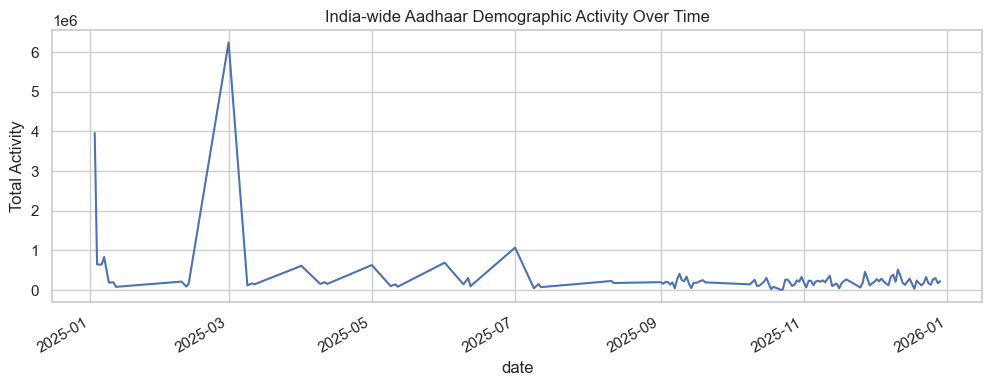

In [3]:
df["total"] = (
    df["demo_age_5_17"].fillna(0) + df["demo_age_17_"].fillna(0)
)

india_daily = df.groupby("date")["total"].sum()

plt.figure(figsize=(12,4))
india_daily.plot()
plt.title("India-wide Aadhaar Demographic Activity Over Time")
plt.ylabel("Total Activity")
plt.show()

In [4]:
district_totals = (
    df.groupby(["state", "district"])["total"]
      .sum()
      .sort_values(ascending=False)
)

district_totals.head(10)

state        district         
maharashtra  thane                340729
             pune                 340437
west bengal  south 24 parganas    318295
gujarat      surat                288462
west bengal  murshidabad          278622
delhi        north west delhi     269372
karnataka    bengaluru            239060
rajasthan    jaipur               225935
west bengal  north 24 parganas    217995
gujarat      ahmedabad            207791
Name: total, dtype: Int32

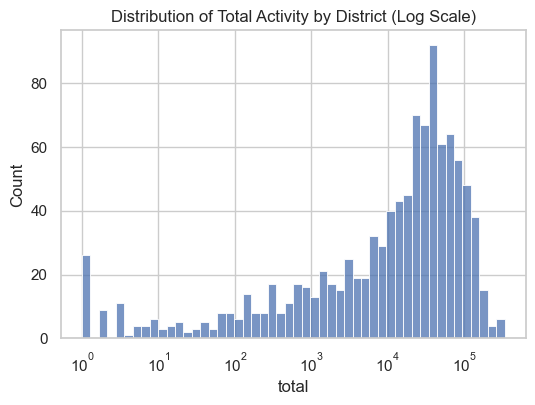

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(district_totals, bins=50, log_scale=True)
plt.title("Distribution of Total Activity by District (Log Scale)")
plt.show()

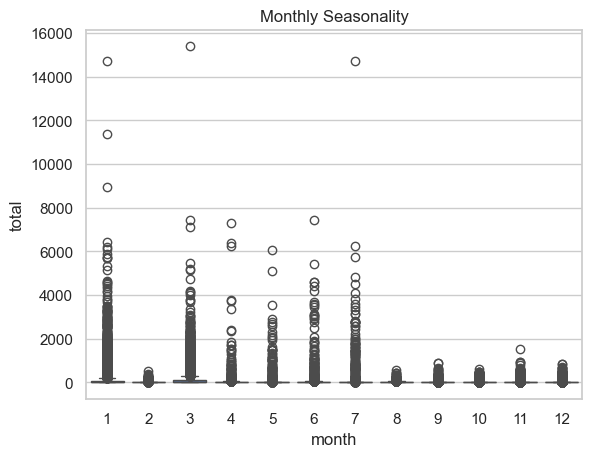

In [6]:
df["month"] = df["date"].dt.month
df["dow"] = df["date"].dt.dayofweek

sns.boxplot(x="month", y="total", data=df.sample(200_000))
plt.title("Monthly Seasonality")
plt.show()

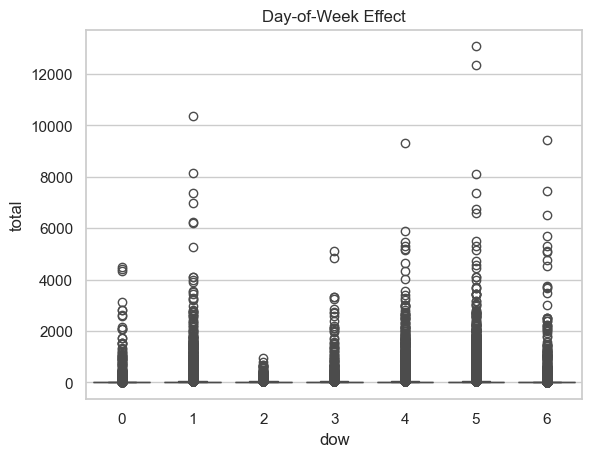

In [7]:
sns.boxplot(x="dow", y="total", data=df.sample(200_000))
plt.title("Day-of-Week Effect")
plt.show()

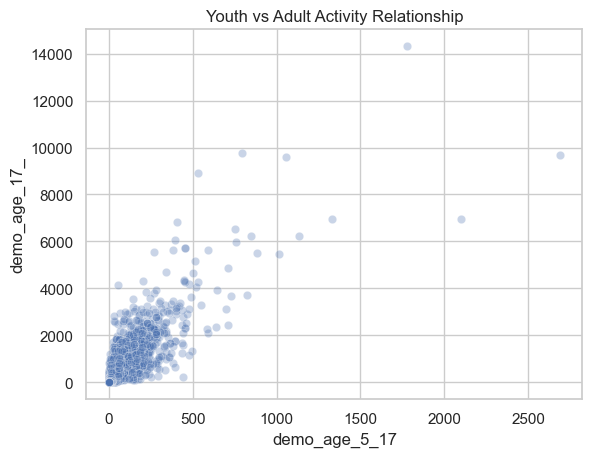

In [8]:
sns.scatterplot(
    x="demo_age_5_17",
    y="demo_age_17_",
    data=df.sample(200_000),
    alpha=0.3
)
plt.title("Youth vs Adult Activity Relationship")
plt.show()


In [9]:
df[["demo_age_5_17", "demo_age_17_"]].corr()

,demo_age_5_17,demo_age_17_
demo_age_5_17,1.000000,0.854049
demo_age_17_,0.854049,1.000000


In [10]:
district_stats = (
    df.groupby(["state", "district"])["total"]
      .agg(["mean", "std"])
)

district_stats["cv"] = district_stats["std"] / district_stats["mean"]
district_stats.sort_values("cv", ascending=False).head(10)

,,mean,std,cv
state,district,,,
chhattisgarh,kondagaon,84.866197,821.150615,9.675827
punjab,amritsar,35.989145,331.728393,9.217457
andhra pradesh,tirupati,11.085081,93.859273,8.467171
uttar pradesh,firozabad,80.521951,666.110061,8.272403
uttarakhand,nainital,35.003364,269.443715,7.697652
maharashtra,raigad,15.266955,113.973877,7.465397
jharkhand,hazaribag,14.043243,104.511922,7.44215
andhra pradesh,annamayya,11.458882,84.797579,7.400161
haryana,panipat,64.09264,462.115282,7.210115


In [11]:
weekly = (
    df.set_index("date")
      .groupby(["state", "district"])
      .resample("W")["total"]
      .sum()
      .reset_index()
)